In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST dataset from keras.datasets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))

((60000, 28, 28), (60000,)) ((10000, 28, 28), (10000,))


Training data --> 60.000 Images

Test data --> 10.000 Images

Image dimension --> 28 x 28

In [4]:
# printing the  7th image
print(X_train[7])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

    0   0   0   0   0   0   0   0   0   0]

 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

    0   0   0   0   0   0   0   0   0   0]

 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

    0   0   0   0   0   0   0   0   0   0]

 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

    0   0   0   0   0   0   0   0   0   0]

 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

    0   0   0   0   0   0   0   0   0   0]

 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253

  253 253 174   6   0   0   0   0   0   0]

 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252

  252 252 252 158  14   0   0   0   0   0]

 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252

  252 252 252 252  59   0   0   0   0   0]

 [  0   0   0   0   0   0   0   0   0 109 252 25

In [5]:
print(X_train[7].shape)

(28, 28)


1


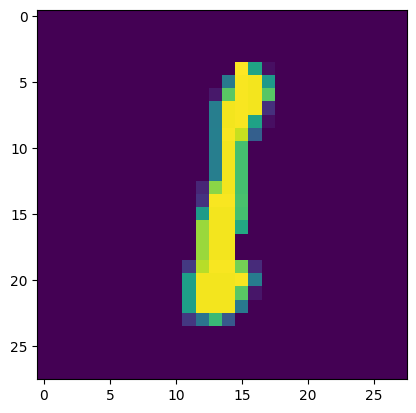

In [6]:
# displaying the image
plt.imshow(X_train[450])

# print the corresponding label
print(y_train[450])

All the images have the same dimensions in this dataset.

Image Labels

In [7]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [8]:
# Unique values in y_train
print(np.unique(y_train))

# Unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]

[0 1 2 3 4 5 6 7 8 9]


Scaling the value

In [9]:
# Before Scaling
print(X_train[0].max())

X_train = X_train /255

# After Scaling
print(X_train[0].max())

255

1.0


In [10]:
# Before Scaling
print(X_test[0].max())

X_test = X_test /255

# After Scaling
print(X_test[0].max())

255

1.0


# Building the Neural Network

 ### Experiment 1

In [ ]:
# settting up of the Neural Network

model1= keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(units= 50, activation= tf.nn.relu),
        keras.layers.Dense(units= 50, activation= tf.nn.relu),
        keras.layers.Dense(units= 10, activation= tf.nn.softmax)
        ]
)


In [ ]:
# Compile the model
model1.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [ ]:
# Fit the model
history1= model1.fit(X_train, y_train,epochs=10)

Epoch 1/10

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2983 - accuracy: 0.9131

Epoch 2/10

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1444 - accuracy: 0.9563

Epoch 3/10

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1064 - accuracy: 0.9680

Epoch 4/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0858 - accuracy: 0.9737

Epoch 5/10

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0701 - accuracy: 0.9789

Epoch 6/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0596 - accuracy: 0.9810

Epoch 7/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0533 - accuracy: 0.9827

Epoch 8/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0460 - accuracy: 0.9852

Epoch 9/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0412 - accuracy: 0.9866

Epoch 10/10

1875/1875 [==============================] - 7s 4ms

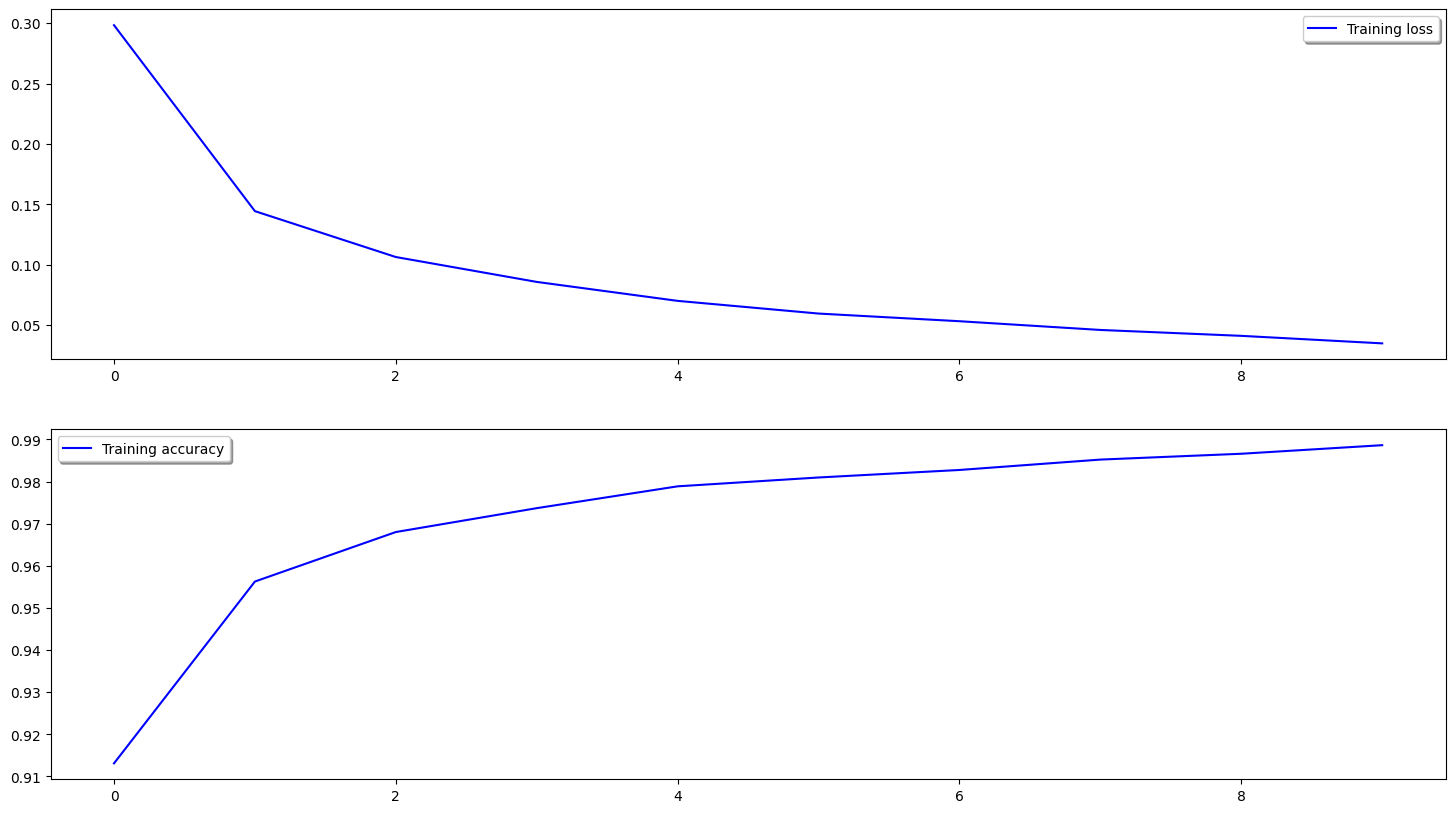

In [ ]:
# Plot the loss and accuracy curves for training
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history1.history['loss'], color='b', label="Training loss")

legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history1.history['accuracy'], color='b', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**Training Data** accuracy is = 98.84 %

### Experiment 2

In [ ]:
# settting up of the Neural Network

model2= keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(units= 50, activation= tf.nn.relu),
        keras.layers.Dense(units= 50, activation= tf.nn.relu),
        keras.layers.Dense(units= 10, activation= tf.nn.softmax)
        ]
)

# Compile the model
model2.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(0.01),
               metrics=["accuracy"])

# Fit the model
history2= model2.fit(X_train, y_train,epochs=10)

Epoch 1/10

1875/1875 [==============================] - 7s 3ms/step - loss: 0.2781 - accuracy: 0.9179

Epoch 2/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1880 - accuracy: 0.9481

Epoch 3/10

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1641 - accuracy: 0.9544

Epoch 4/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1473 - accuracy: 0.9606

Epoch 5/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1433 - accuracy: 0.9622

Epoch 6/10

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1325 - accuracy: 0.9645

Epoch 7/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1251 - accuracy: 0.9667

Epoch 8/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1282 - accuracy: 0.9671

Epoch 9/10

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1260 - accuracy: 0.9675

Epoch 10/10

1875/1875 [==============================] - 7s 4ms

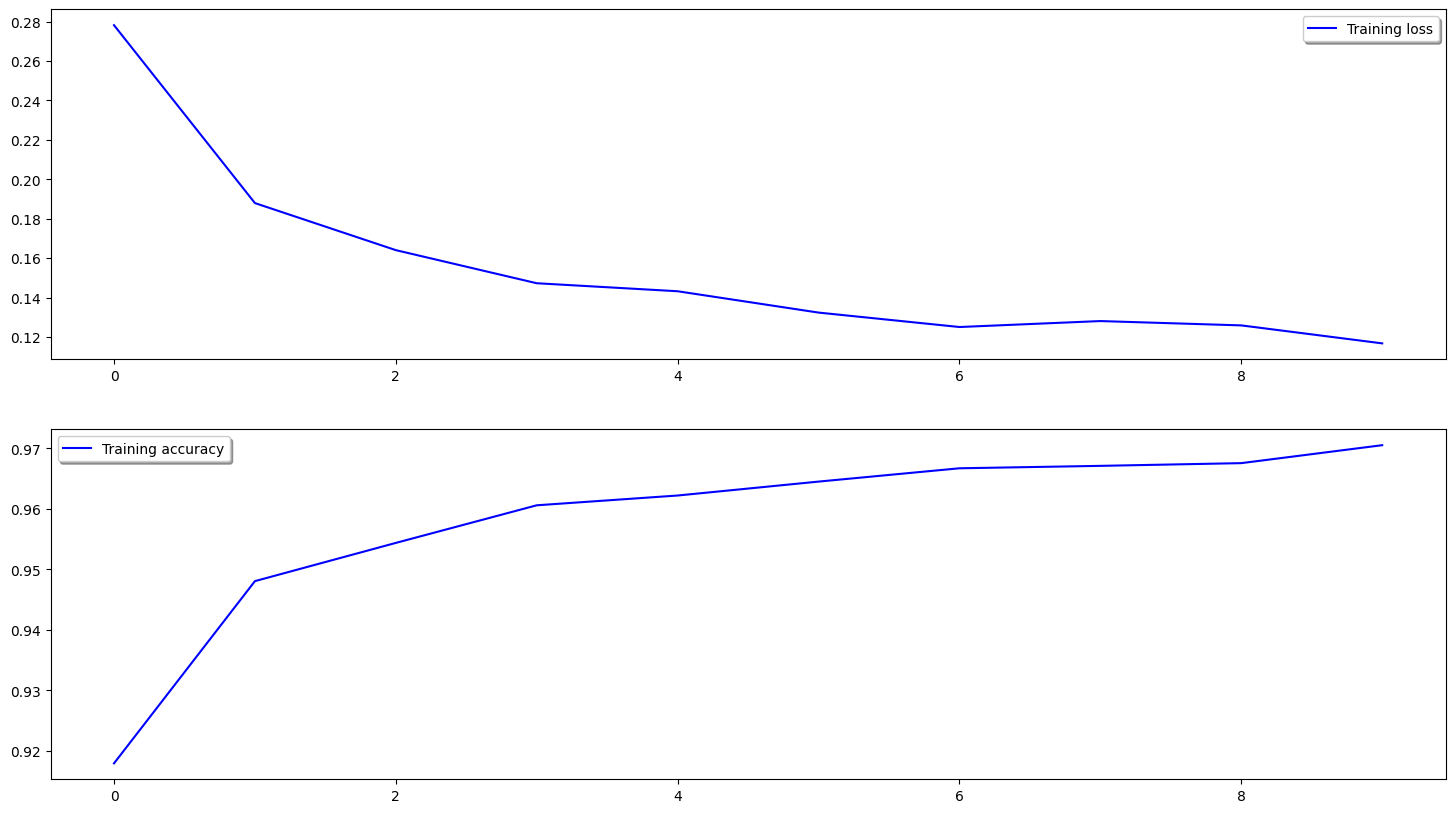

In [ ]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history2.history['loss'], color='b', label="Training loss")

legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history2.history['accuracy'], color='b', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**Summary:** We change the model2 learning_rate is 10 times bigger than model1 learning_rate but accuracy is smaller than model1

### Experiment 3

In [ ]:
# settting up of the Neural Network

model3= keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(units= 70, activation= tf.nn.relu),
        keras.layers.Dense(units= 50, activation= tf.nn.relu),
        keras.layers.Dense(units= 10, activation= tf.nn.softmax)
        ]
)

# Compile the model
model3.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
history3= model3.fit(X_train, y_train,epochs=10)

Epoch 1/10

1875/1875 [==============================] - 7s 3ms/step - loss: 0.2780 - accuracy: 0.9190

Epoch 2/10

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1215 - accuracy: 0.9635

Epoch 3/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0880 - accuracy: 0.9732

Epoch 4/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0691 - accuracy: 0.9787

Epoch 5/10

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0570 - accuracy: 0.9816

Epoch 6/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0478 - accuracy: 0.9849

Epoch 7/10

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0399 - accuracy: 0.9874

Epoch 8/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0368 - accuracy: 0.9882

Epoch 9/10

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0318 - accuracy: 0.9898

Epoch 10/10

1875/1875 [==============================] - 7s 4m

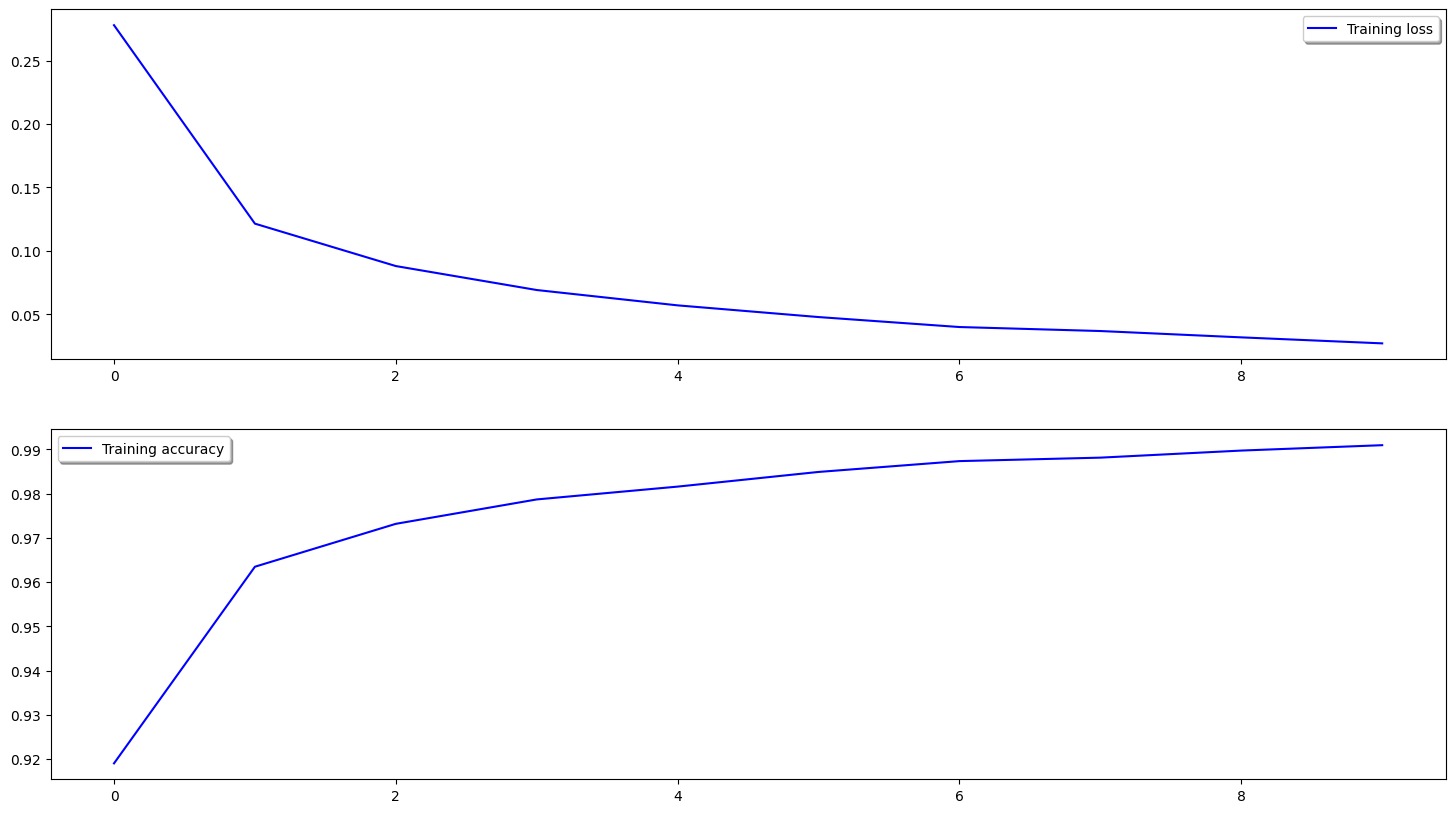

In [ ]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history3.history['loss'], color='b', label="Training loss")

legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history3.history['accuracy'], color='b', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)

* **Summary:** We change model1 to add 20 neuron in the first layer.
* Accuracy: **98.4%** --->**99.07%**

 ### Experiment 4

In [ ]:
# settting up of the Neural Network
lr= [0.001, 0.003,0.009,0.01]
for lr in lr:
  print(f"Leearning Rate:{lr}")
  model4= keras.Sequential([
          keras.layers.Flatten(input_shape=(28, 28)),
          keras.layers.Dense(units= 70, activation= tf.nn.relu),
          keras.layers.Dense(units= 50, activation= tf.nn.relu),
          keras.layers.Dense(units= 10, activation= tf.nn.softmax)
          ]
  )

  # Compile the model
  model4.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                metrics=["accuracy"])

  # Fit the model
  history4= model4.fit(X_train, y_train,epochs=10)


Leearning Rate:0.001

Epoch 1/10

1875/1875 [==============================] - 8s 3ms/step - loss: 0.2799 - accuracy: 0.9184

Epoch 2/10

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1207 - accuracy: 0.9633

Epoch 3/10

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0871 - accuracy: 0.9729

Epoch 4/10

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0692 - accuracy: 0.9788

Epoch 5/10

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0563 - accuracy: 0.9823

Epoch 6/10

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0475 - accuracy: 0.9844

Epoch 7/10

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0399 - accuracy: 0.9873

Epoch 8/10

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0356 - accuracy: 0.9887

Epoch 9/10

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0310 - accuracy: 0.9897

Epoch 10/10

1875/1875 [==================

For finding the best **learning_rate** value. I create a list which contain different learning rate values.
The best value is **Adam** default value **learning_rate= 0.001**

### Experiment 5

In [ ]:
# settting up of the Neural Network

model5= keras.Sequential([
          keras.layers.Flatten(input_shape=(28, 28)),
          keras.layers.Dense(units= 100, activation= tf.nn.relu),
          keras.layers.Dense(units= 50, activation= tf.nn.relu),
          keras.layers.Dense(units= 10, activation= tf.nn.softmax)
          ]
  )

# Compile the model
model5.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history5= model5.fit(X_train, y_train,epochs=10)

Epoch 1/10

1875/1875 [==============================] - 7s 3ms/step - loss: 0.2632 - accuracy: 0.9239

Epoch 2/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1147 - accuracy: 0.9653

Epoch 3/10

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0800 - accuracy: 0.9754

Epoch 4/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0616 - accuracy: 0.9807

Epoch 5/10

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0485 - accuracy: 0.9848

Epoch 6/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0403 - accuracy: 0.9871

Epoch 7/10

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0334 - accuracy: 0.9893

Epoch 8/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0268 - accuracy: 0.9913

Epoch 9/10

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0242 - accuracy: 0.9917

Epoch 10/10

1875/1875 [==============================] - 6s 3ms

First Layer neuron increased by **70 --> 100**

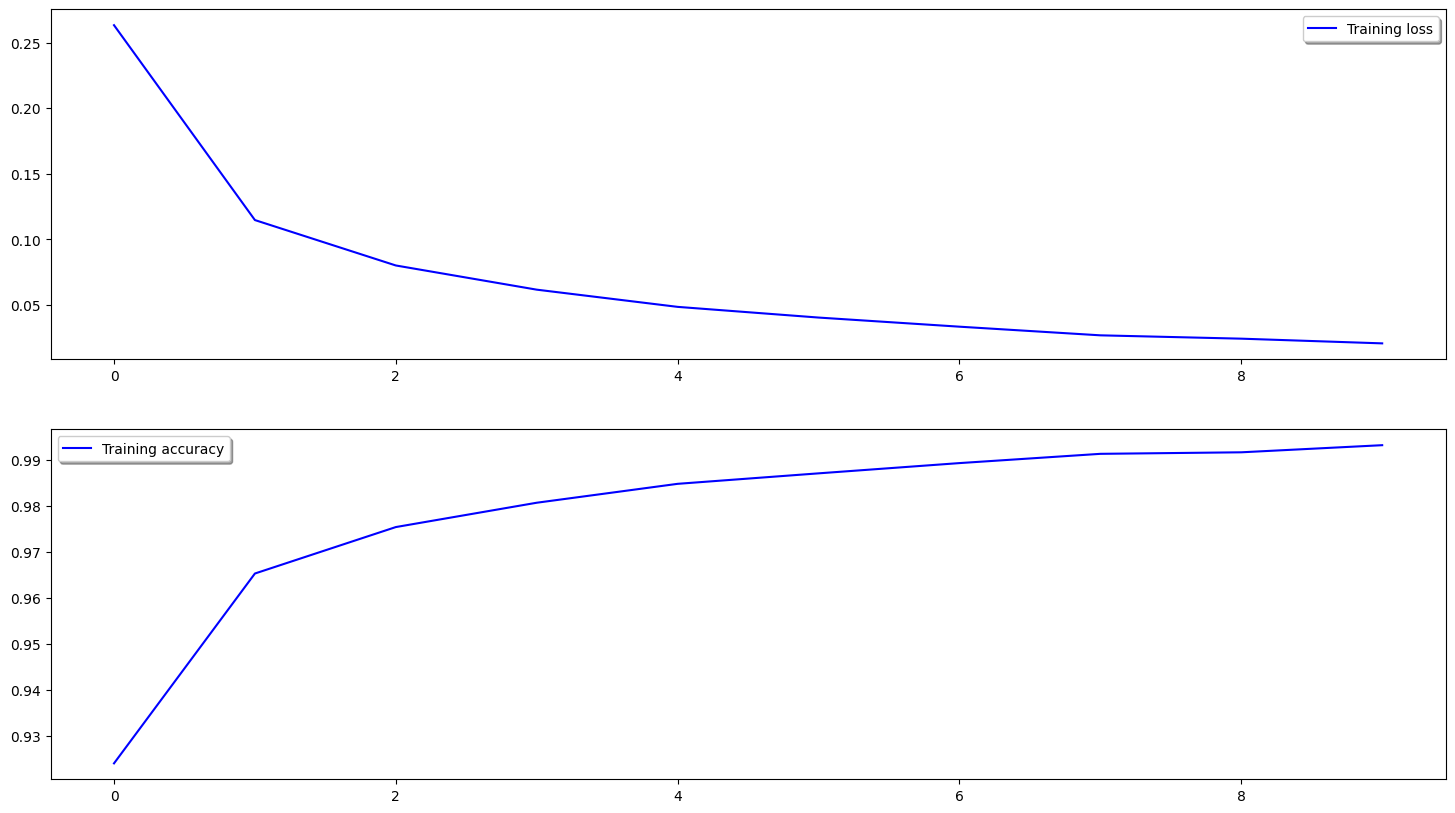

In [ ]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history5.history['loss'], color='b', label="Training loss")

legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history5.history['accuracy'], color='b', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Experiment 6

In [ ]:
# settting up of the Neural Network

model6= keras.Sequential([
          keras.layers.Flatten(input_shape=(28, 28)),
          keras.layers.Dense(units= 100, activation= tf.nn.relu),
          keras.layers.Dense(units= 100, activation= tf.nn.relu),
          keras.layers.Dense(units= 10, activation= tf.nn.softmax)
          ]
  )

# Compile the model
model6.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history6= model6.fit(X_train, y_train,epochs=20)

Epoch 1/20

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2445 - accuracy: 0.9281

Epoch 2/20

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1041 - accuracy: 0.9682

Epoch 3/20

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0732 - accuracy: 0.9775

Epoch 4/20

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0570 - accuracy: 0.9816

Epoch 5/20

1875/1875 [==============================] - 10s 6ms/step - loss: 0.0410 - accuracy: 0.9868

Epoch 6/20

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0364 - accuracy: 0.9881

Epoch 7/20

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0307 - accuracy: 0.9899

Epoch 8/20

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0270 - accuracy: 0.9905

Epoch 9/20

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0219 - accuracy: 0.9930

Epoch 10/20

1875/1875 [==============================] - 9s 

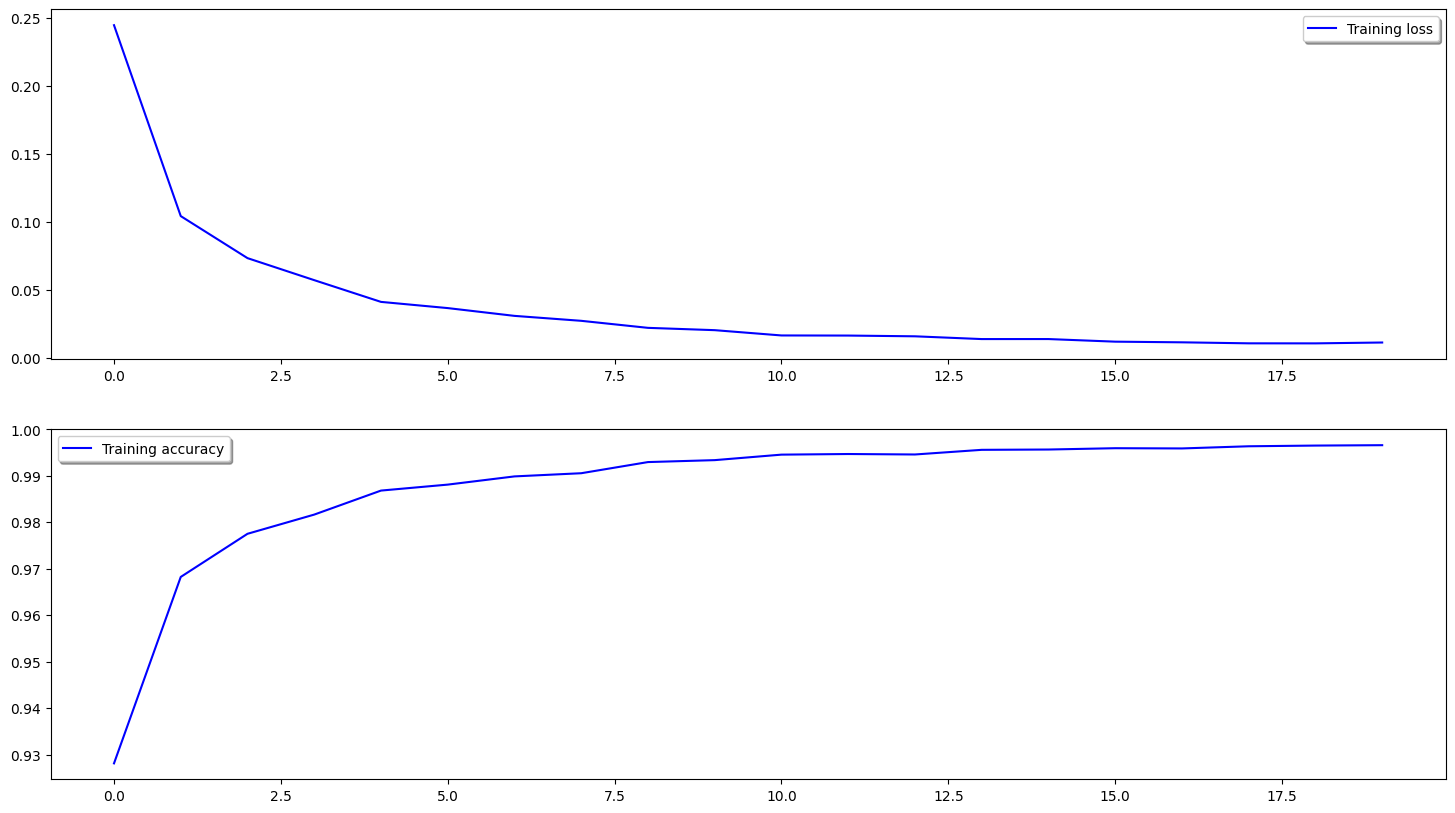

In [ ]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history6.history['loss'], color='b', label="Training loss")

legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history6.history['accuracy'], color='b', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
test_loss, test_accuracy = model6.evaluate(X_test, y_test)
print(test_accuracy*100)

313/313 [==============================] - 2s 6ms/step - loss: 0.1258 - accuracy: 0.9777

97.76999950408936


In experiment6 ,we have higgest accuracy on the training set

Accuracy on the **Test set** is lower than **Train Set accuracy**:

* We have some technic to increase Test Set Accuracy:
* 1. Regularization
* 2. Adding more data

Because we don't have more data, we will use **regularization** to prevent overfitting

### Experiment 7

In [11]:
lambd= [0.0001, 0.0003 ,0.001, 0.003, 0.01, 0.03, 0.1]
history7 =[]
for i in range(len(lambd)):
  print(f"Lambda: {lambd[i]}")
  model7= keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),
            keras.layers.Dense(units= 100, activation= tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(lambd[i])),
            keras.layers.Dense(units= 100, activation= tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(lambd[i])),
            keras.layers.Dense(units= 10, activation= tf.nn.softmax)
            ]
    )

  # Compile the model
  model7.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

  # Fit the model
  history= model7.fit(X_train, y_train,epochs=15,validation_data=(X_test, y_test))
  history7.append(history)

Lambda: 0.0001

Epoch 1/15

1875/1875 [==============================] - 13s 4ms/step - loss: 0.2755 - accuracy: 0.9276 - val_loss: 0.1683 - val_accuracy: 0.9585

Epoch 2/15

1875/1875 [==============================] - 9s 5ms/step - loss: 0.1473 - accuracy: 0.9658 - val_loss: 0.1377 - val_accuracy: 0.9679

Epoch 3/15

1875/1875 [==============================] - 10s 5ms/step - loss: 0.1208 - accuracy: 0.9743 - val_loss: 0.1372 - val_accuracy: 0.9670

Epoch 4/15

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1061 - accuracy: 0.9798 - val_loss: 0.1300 - val_accuracy: 0.9706

Epoch 5/15

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0966 - accuracy: 0.9826 - val_loss: 0.1195 - val_accuracy: 0.9761

Epoch 6/15

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0931 - accuracy: 0.9836 - val_loss: 0.1168 - val_accuracy: 0.9760

Epoch 7/15

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0859 - accuracy: 0.9863 - v

We try different Regularization parameter **LAMBDA**:

* Lambda: 0.0001 --> **Train Acc: 99.03%  Test Acc: 97.47%**

* Lambda: 0.0003 --> **Train Acc: 98.52%  Test Acc: 97.46%**

* Lambda: 0.001 --> **Train Acc:97.62%  Test Acc: 97.24%**

* Lambda: 0.003  --> **Train Acc: 96.67%  Test Acc: 96.29%**

* Lambda: 0.01  --> **Train Acc: 95.29%  Test Acc:  95.52%**

* Lambda: 0.03  --> **Train Acc: 93.21%  Test Acc:  93.72%**

* Lambda: 0.1  --> **Train Acc: 89%   Test Acc: 90.07%**


Lambda: 0.01 is suitable choice for problem.

### Experiment 8

In [24]:
# settting up of the Neural Network

model8= keras.Sequential([
          keras.layers.Flatten(input_shape=(28, 28)),
          keras.layers.Dense(units= 200, activation= tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(l2= 0.001)),
          keras.layers.Dense(units= 200, activation= tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(l2= 0.001)),
          keras.layers.Dense(units= 10, activation= tf.nn.softmax)
          ]
  )

# Compile the model
model8.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.0003),
                metrics=["accuracy"])

# Fit the model
history8= model8.fit(X_train, y_train,epochs=30,validation_data=(X_test, y_test))

Epoch 1/30

1875/1875 [==============================] - 8s 4ms/step - loss: 0.6123 - accuracy: 0.9149 - val_loss: 0.4058 - val_accuracy: 0.9490

Epoch 2/30

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3407 - accuracy: 0.9580 - val_loss: 0.2842 - val_accuracy: 0.9654

Epoch 3/30

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2558 - accuracy: 0.9685 - val_loss: 0.2348 - val_accuracy: 0.9685

Epoch 4/30

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2109 - accuracy: 0.9729 - val_loss: 0.2026 - val_accuracy: 0.9711

Epoch 5/30

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1834 - accuracy: 0.9764 - val_loss: 0.1820 - val_accuracy: 0.9736

Epoch 6/30

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1665 - accuracy: 0.9781 - val_loss: 0.1734 - val_accuracy: 0.9738

Epoch 7/30

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1548 - accuracy: 0.9802 - val_loss: 0.1652 - 

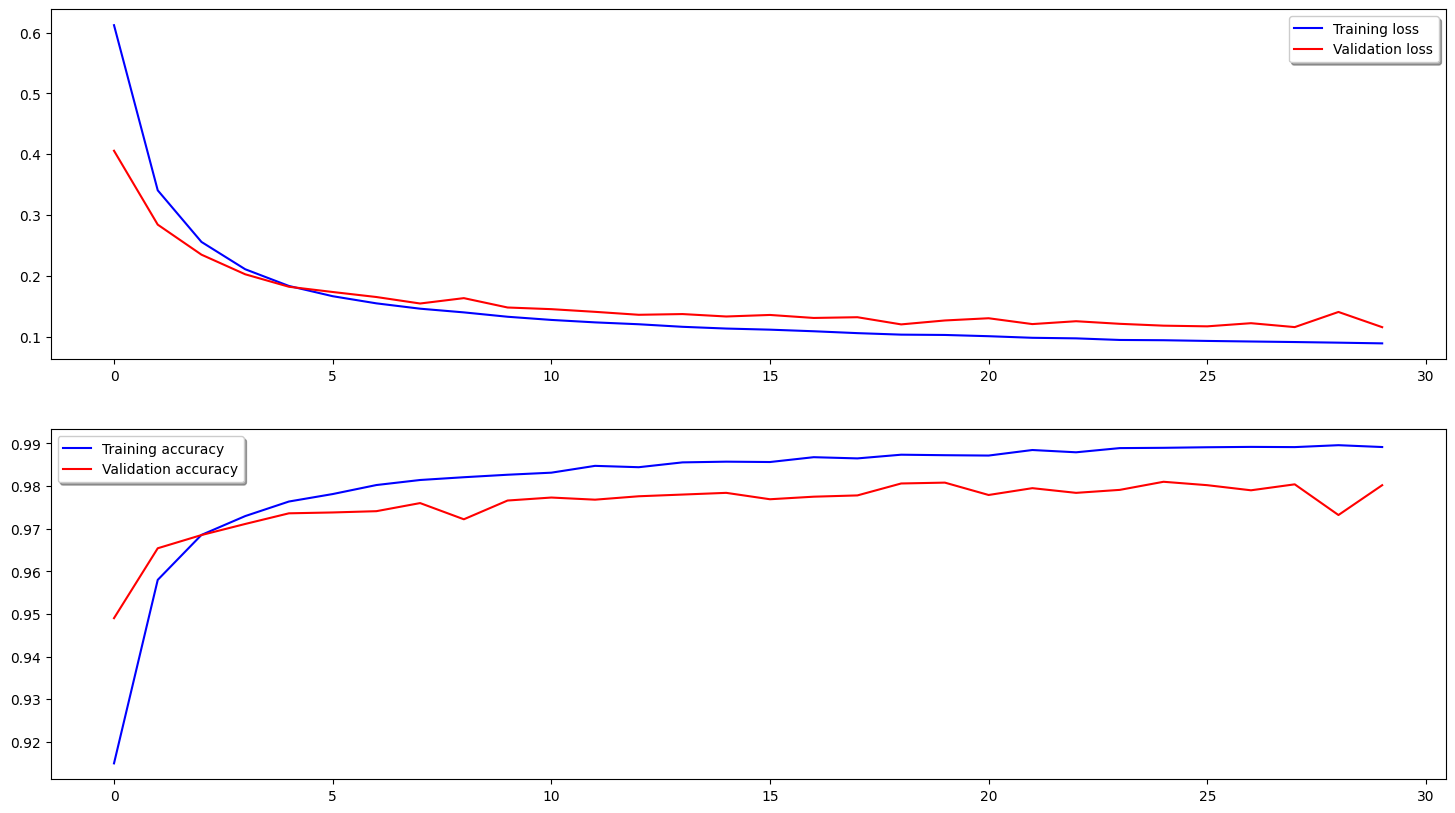

In [91]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history8.history['loss'], color='b', label="Training loss")
ax[0].plot(history8.history['val_loss'], color='r', label="Validation loss")


legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history8.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history8.history['val_accuracy'], color='r', label="Validation accuracy")

legend = ax[1].legend(loc='best', shadow=True)

In [96]:
test_loss, test_accuracy = model8.evaluate(X_test, y_test)
print(test_accuracy*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1156 - accuracy: 0.9802

98.01999926567078


In [98]:
train_loss, train_accuracy = model8.evaluate(X_train, y_train)
print(train_accuracy*100)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0788 - accuracy: 0.9935

99.35166835784912


# Predict with best Models

In [105]:
y_pred = model8.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [106]:
y_pred.shape

(10000, 10)

In [109]:
y_pred[0]

array([2.10345024e-06, 9.16754652e-06, 6.99530437e-06, 1.73708013e-05,
       4.94722805e-08, 2.45307234e-07, 1.79267462e-10, 9.99847651e-01,
       1.17139571e-07, 1.16313546e-04], dtype=float32)

* Each y_pred value is containe  teh probabilities of each class.
* 0 to 9

In [108]:
y_pred_labels =[np.argmax(probabilities) for probabilities in y_pred]
y_pred_labels[0]

7

### Confusion Matrix

In [116]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [117]:
print(conf_mat)

tf.Tensor(

[[ 972    1    1    1    0    0    0    1    2    2]

 [   0 1129    2    0    0    0    2    0    2    0]

 [   4    3 1005    5    2    0    3    6    4    0]

 [   1    1    2  994    0    2    0    5    3    2]

 [   3    0    2    0  962    1    4    1    0    9]

 [   2    1    1   13    0  865    2    2    4    2]

 [   5    3    1    0    7    3  939    0    0    0]

 [   1    9    6    0    1    0    0 1005    3    3]

 [   6    0    1    5    3    2    3    4  947    3]

 [   3    3    0    2   10    1    0    4    2  984]], shape=(10, 10), dtype=int32)


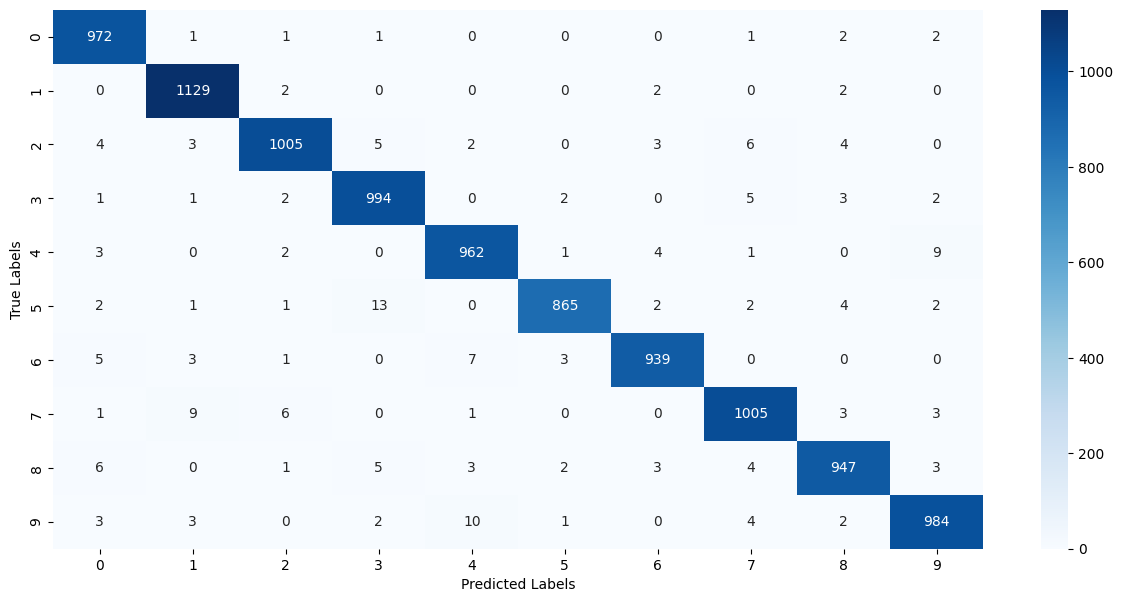

In [118]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt="d",cmap="Blues")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels");